In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.interpolate import interp1d
import re
sns.set_style('white')
sns.set_context('talk')

# Import results from the Toy MC

Create the dataframe that will contain the data

In [2]:
df = pd.DataFrame(columns = ['site', 'method','cap_vol', 'cap_e_min','cap_e_max', 
                             'Xe137_tag_eff', 'mean', 'counts', 'bins'])
d = {}
with open('results/data_LYOnly_AllLXe_2023_02_24.txt') as f:
    for line in f:
        if line.startswith('Site:'):
            d['site'] = line.split(":")[1].strip()
            # print(d['site'])
        if line.startswith('Neutron capture energy variable:'):
            d['method'] = line.split(":")[1].strip()
        if line.startswith('Neutron capture volume:'):
            d['cap_vol'] = line.split(":")[1].strip()
        if line.startswith('Neutron capture window'):
            tmp = line.split(":")[1].strip().strip('][').split(',')
            d['cap_e_min'] = tmp[0]
            d['cap_e_max'] = tmp[1]
        if line.startswith('137Xe Tagging'):
            d['Xe137_tag_eff'] = float(line.split(":")[1].strip())
        if line.startswith('Unvetoed Xe137 [atoms] Mean'):
            d['mean'] = float(re.findall(r'[\d]*[.][\d]+', line)[0])
        if line.startswith('Unvetoed 137Xe trials/bin'):
            while line.strip().endswith(','):
                line = line.strip() + next(f)
                # print(line.strip(''))
            d['counts'] = [float(x) for x in line.split("[")[1].strip('\n][').split(',')]
        if line.startswith('Unvetoed 137Xe bins'):
            while line.strip().endswith(','):
                line = line.strip() + next(f)
                # print(line.strip(''))
            d['bins'] = [float(x) for x in line.split("[")[1].strip('\n][').split(',')]
            # end of record, add to dataframe
            df = df.append(d, ignore_index=True)

display(df)

/var/tmp/samuele/ipykernel_872078/2987700783.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)
/var/tmp/samuele/ipykernel_872078/2987700783.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)
/var/tmp/samuele/ipykernel_872078/2987700783.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)
/var/tmp/samuele/ipykernel_872078/2987700783.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index=True)
/var/tmp/samuele/ipykernel_872078/2987700783.py:32: FutureWarning: The frame.append method is deprecated

,site,method,cap_vol,cap_e_min,cap_e_max,Xe137_tag_eff,mean,counts,bins
0,SNOLAB,LightOnly,All LXe,0,4600,0.968309,4.0475,"[9.0, 29.0, 60.0, 0.0, 83.0, 68.0, 65.0, 0.0, ...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6..."
1,SNOLAB,LightOnly,All LXe,400,4600,0.931757,5.9825,"[2.0, 7.0, 20.0, 0.0, 46.0, 45.0, 61.0, 0.0, 5...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6..."
2,SNOLAB,LightOnly,All LXe,1400,4600,0.813895,13.0275,"[11.0, 11.0, 15.0, 26.0, 26.0, 46.0, 45.0, 52....","[5.0, 6.1, 7.2, 8.3, 9.4, 10.5, 11.6, 12.7, 13..."
3,SNOLAB,LightOnly,All LXe,1800,4600,0.779061,15.2575,"[7.0, 9.0, 11.0, 25.0, 24.0, 23.0, 39.0, 42.0,...","[6.0, 7.1, 8.2, 9.3, 10.4, 11.5, 12.6, 13.7, 1..."
4,SNOLAB,LightOnly,All LXe,2600,4600,0.703299,21.2025,"[9.0, 5.0, 11.0, 11.0, 31.0, 24.0, 24.0, 27.0,...","[10.0, 11.25, 12.5, 13.75, 15.0, 16.25, 17.5, ..."
5,SNOLAB,LightOnly,All LXe,400,9000,0.938704,5.3750,"[2.0, 17.0, 25.0, 54.0, 0.0, 57.0, 72.0, 56.0,...","[0.0, 0.8, 1.6, 2.4, 3.2, 4.0, 4.8, 5.6, 6.4, ..."
6,SNOLAB,LightOnly,All LXe,1400,9000,0.820841,11.6650,"[2.0, 4.0, 8.0, 6.0, 21.0, 34.0, 35.0, 39.0, 5...","[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0..."
7,LNGS,LightOnly,All LXe,0,4600,0.968309,377.7100,"[1.0, 0.0, 4.0, 2.0, 1.0, 2.0, 9.0, 9.0, 12.0,...","[319.0, 324.8, 330.6, 336.4, 342.2, 348.0, 353..."
8,LNGS,LightOnly,All LXe,400,4600,0.931757,553.1000,"[2.0, 1.0, 2.0, 3.0, 6.0, 5.0, 6.0, 14.0, 5.0,...","[496.0, 501.9, 507.8, 513.7, 519.6, 525.5, 531..."
9,LNGS,LightOnly,All LXe,1400,4600,0.813895,1193.2400,"[1.0, 1.0, 1.0, 5.0, 2.0, 7.0, 3.0, 6.0, 15.0,...","[1109.0, 1117.35, 1125.7, 1134.05, 1142.4, 115..."


In [3]:
#drop WIPP
df = df[df.site != 'WIPP']

In [4]:
df = df.assign(n_absorber_factor = 1)
tmp = df[(df.site=='LNGS') & (round(df.Xe137_tag_eff,2)==0.81)]
tmp = tmp.assign(n_absorber_factor = 10)
tmp = tmp.assign(mean=tmp.iloc[0,6]/10.)
df = df.append(tmp, ignore_index=True)
tmp = df[(df.site=='LNGS') & (round(df.Xe137_tag_eff,2)==0.81)]
tmp = tmp.assign(n_absorber_factor = 2)
tmp = tmp.assign(mean=tmp.iloc[0,6]/2.)
df = df.append(tmp, ignore_index=True)
display(df)

/var/tmp/samuele/ipykernel_872078/318006622.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)
/var/tmp/samuele/ipykernel_872078/318006622.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp, ignore_index=True)


,site,method,cap_vol,cap_e_min,cap_e_max,Xe137_tag_eff,mean,counts,bins,n_absorber_factor
0,SNOLAB,LightOnly,All LXe,0,4600,0.968309,4.0475,"[9.0, 29.0, 60.0, 0.0, 83.0, 68.0, 65.0, 0.0, ...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6...",1
1,SNOLAB,LightOnly,All LXe,400,4600,0.931757,5.9825,"[2.0, 7.0, 20.0, 0.0, 46.0, 45.0, 61.0, 0.0, 5...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6...",1
2,SNOLAB,LightOnly,All LXe,1400,4600,0.813895,13.0275,"[11.0, 11.0, 15.0, 26.0, 26.0, 46.0, 45.0, 52....","[5.0, 6.1, 7.2, 8.3, 9.4, 10.5, 11.6, 12.7, 13...",1
3,SNOLAB,LightOnly,All LXe,1800,4600,0.779061,15.2575,"[7.0, 9.0, 11.0, 25.0, 24.0, 23.0, 39.0, 42.0,...","[6.0, 7.1, 8.2, 9.3, 10.4, 11.5, 12.6, 13.7, 1...",1
4,SNOLAB,LightOnly,All LXe,2600,4600,0.703299,21.2025,"[9.0, 5.0, 11.0, 11.0, 31.0, 24.0, 24.0, 27.0,...","[10.0, 11.25, 12.5, 13.75, 15.0, 16.25, 17.5, ...",1
5,SNOLAB,LightOnly,All LXe,400,9000,0.938704,5.3750,"[2.0, 17.0, 25.0, 54.0, 0.0, 57.0, 72.0, 56.0,...","[0.0, 0.8, 1.6, 2.4, 3.2, 4.0, 4.8, 5.6, 6.4, ...",1
6,SNOLAB,LightOnly,All LXe,1400,9000,0.820841,11.6650,"[2.0, 4.0, 8.0, 6.0, 21.0, 34.0, 35.0, 39.0, 5...","[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0...",1
7,LNGS,LightOnly,All LXe,0,4600,0.968309,377.7100,"[1.0, 0.0, 4.0, 2.0, 1.0, 2.0, 9.0, 9.0, 12.0,...","[319.0, 324.8, 330.6, 336.4, 342.2, 348.0, 353...",1
8,LNGS,LightOnly,All LXe,400,4600,0.931757,553.1000,"[2.0, 1.0, 2.0, 3.0, 6.0, 5.0, 6.0, 14.0, 5.0,...","[496.0, 501.9, 507.8, 513.7, 519.6, 525.5, 531...",1
9,LNGS,LightOnly,All LXe,1400,4600,0.813895,1193.2400,"[1.0, 1.0, 1.0, 5.0, 2.0, 7.0, 3.0, 6.0, 15.0,...","[1109.0, 1117.35, 1125.7, 1134.05, 1142.4, 115...",1


In [5]:
ref_spec_activ = 2.684796228e-8 # mBq/kg, from R-088.1 materials db
LXe_vol = 4896 # kg
df['mean_xe137_spec_activ'] = df.apply(lambda x: x['mean'] / 10. / LXe_vol * 1000 / (365 * 24 * 3600), axis=1)
df['Xe137_scaling'] = df.apply(lambda x: x['mean_xe137_spec_activ'] / ref_spec_activ, axis=1)

# Load sensitivity code to compute background composition

In [6]:
# Import sys, then tell python where to find the nEXO-specific classes
import sys
sys.path.append('../../../modules')
# sys.path.append('/Users/sangiorgio1/SoftwareProjects/sensitivity/modules')

In [7]:
# Import the nEXO sensitivity classes
import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood

In [8]:
def get_expected_counts(s):

    # Note that I use ComponentsTable and Config file that define a much finer binning
    config = '/g/g92/samuele/nEXO/sensitivity/work/SensitivityPaper2020_scripts/' \
             'SiteSelectionStudy/Sensitivity2020_Optimized_DNN_Standoff_Binning_version1_fineBinning_Xe137.yaml'
    components_table_dir = Path('/p/lustre2/nexouser/samuele/multivarstudy/ComponentsTables')
    input_table = components_table_dir / f'ComponentsTable_D-024_DNN_factor=0.0_ERes=0.008.h5'    

    if not input_table.is_file(): 
        print(f"file not exists: {input_table}")
        return

    workspace = nEXOFitWorkspace.nEXOFitWorkspace(config)
    workspace.LoadComponentsTableFromFile(input_table)

    for index, row in workspace.df_components.iterrows():
    # Scale the gamma ray background components, except radon
        # isotopes_to_leave_alone = ['Ar42', 'Xe137', 'bb2n', 'bb0n', 'B8nu', 'Rn222', ]  # just for bookkeeping
        # isotopes_to_scale = ['K40', 'Co60', 'Al26', 'Th232', 'U238', 'Cs137']
        # # The format is <isotope>_<part>, e.g. "Th232_HVCables"
        # if row['PDFName'].split('_')[0] in isotopes_to_scale:
        #     print(f'Scaling {row["PDFName"]}...')
        #     workspace.df_components.loc[index, 'SpecActiv'] = bkg_scale_factor * row['SpecActiv']
        #     workspace.df_components.loc[index, 'SpecActivErr'] = bkg_scale_factor * row['SpecActivErr']

        # Scale the Xe137 to the mean of the specified config distribution if present.
        # This is needed so the initial guesses are properly set
        # if ('Xe137' in row['PDFName']) and workspace.Xe137Sample:
        workspace.Xe137Sample = None
        if ('Xe137' in row['PDFName']):
            print(f'Setting {row["PDFName"]}...')
            workspace.df_components.loc[index, 'SpecActiv'] = s.mean_xe137_spec_activ
            workspace.df_components.loc[index, 'SpecActivErr'] = s.mean_xe137_spec_activ

    workspace.CreateGroupedPDFs()

    # Define the ROI within the workspace
    # Note that the ROI energy depends on the resolution since it's +/- FWHM/2
    # The DNN cut is set at the value for 85% signal efficiency
    fwhm = 2457 * 0.008 * 2.35
    roi_dict = {'DNN': [0.83, 1.],   # see values in the multivariation study tech note
                'Energy (keV)': [2457. - fwhm/2., 2457. + fwhm/2.],
                'Standoff (mm)': [104.5, 650.]}
    # roi_dict = {'DNN': [0.85, 1.],
    #         'Energy (keV)': [2434., 2480.],
    #         'Standoff (mm)': [104.5, 650.]}
    workspace.DefineROI(roi_dict)
#         print(workspace.df_components.loc[0])

    # Create the likelihood object
    likelihood = nEXOFitLikelihood.nEXOFitLikelihood()
    likelihood.AddPDFDataframeToModel(workspace.df_group_pdfs, workspace.histogram_axis_names)

    initial_guess = likelihood.GetVariableValues()

    # Scale the Rn222 component according to the input value
    # rn222_idx = likelihood.model.GetVariableIndexByName('Rn222')
    # initial_guess[rn222_idx] *= rn222_scale_factor

    # Update the model in the likelihood object
    likelihood.model.UpdateVariables(initial_guess)
    likelihood.model.GenerateModelDistribution()

    # Print out the number of events in the ROI
    print(workspace.GetROIBinIndices())
    total_bkg_in_roi = likelihood.model.GetIntegralInBinRange(workspace.GetROIBinIndices())
    output_str = f'TotalROIBkg: {total_bkg_in_roi} cts/10 y\n'
    output_str += f'Mean Xe137 Specific Activity: {workspace.mean_xe137_spec_activ:.4g} mBq/kg\n'

    # for component in likelihood.model.variable_list:
    #     if 'Shape' in component['Name']:
    #         continue
    #     num_counts_in_roi = likelihood.model.GetComponentIntegralInBinRange(
    #         component['Name'], workspace.GetROIBinIndices())
    #     # df.at[tag, component['Name']] = num_counts_in_roi
    #     output_str += f'{component["Name"] + ":":<20}\t'
    #     output_str += f'{num_counts_in_roi:>10.4}\t'
    #     output_str += f'{int(1000 * num_counts_in_roi / total_bkg_in_roi) / 10.:>10.4}%\n'
    # return output_str

    num_counts_in_roi = likelihood.model.GetComponentIntegralInBinRange('Num_Xe137_and_Ar42', workspace.GetROIBinIndices())
    s['total_bkg_in_roi'] = total_bkg_in_roi
    s['Xe137_num_counts_in_roi'] = num_counts_in_roi
    s['Xe137_bkg_fraction'] = int(1000 * num_counts_in_roi / total_bkg_in_roi) / 10.
    return s

In [9]:
from contextlib import redirect_stdout, redirect_stderr
import io
with redirect_stdout(io.StringIO()):    # capture output so it won't pollute the terminal
    with redirect_stderr(io.StringIO()):
       df = df.apply(get_expected_counts, axis=1)

# Load and interpolate sensitivity curves from the 2020 sensitivity analysis

In [10]:
sens_xe137_scaling_d024 = np.genfromtxt('../PaperPlots/Data/d024_sensitivity_vs_xe137.csv',\
                                        delimiter=',',\
                                        skip_header=1)
dp_xe137_scaling_d024 = np.genfromtxt('../PaperPlots/Data/d024_dp_vs_xe137.csv',\
                                        delimiter=',',\
                                        skip_header=1)

In [11]:
xs = sens_xe137_scaling_d024[:,0]
ys = sens_xe137_scaling_d024[:,1]/1.e28
xdp = dp_xe137_scaling_d024[:,0]
ydp = dp_xe137_scaling_d024[:,1]/1.e28

In [12]:
def log_interp1d(xx, yy, kind='linear'):
    logx = np.log10(xx)
    lin_interp = interp1d(logx, yy, kind=kind)
    log_interp = lambda zz: lin_interp(np.log10(zz))
    return log_interp

In [13]:
sens_log_interp = log_interp1d(xs, ys)
dp_log_interp = log_interp1d(xdp, ydp)

In [14]:
x_dense = np.linspace(0.01, 100, num=1001)

In [15]:
#see https://stackoverflow.com/questions/12555323/how-to-add-a-new-column-to-an-existing-dataframe/12555510#12555510
df.loc[:, 'sens'] = df.apply(lambda x: sens_log_interp(x['Xe137_scaling']), axis=1)
df.loc[:, 'dp'] = df.apply(lambda x: dp_log_interp(x['Xe137_scaling']), axis=1)

In [16]:
df.head()

,site,method,cap_vol,cap_e_min,cap_e_max,Xe137_tag_eff,mean,counts,bins,n_absorber_factor,mean_xe137_spec_activ,Xe137_scaling,total_bkg_in_roi,Xe137_num_counts_in_roi,Xe137_bkg_fraction,sens,dp
0,SNOLAB,LightOnly,All LXe,0,4600,0.968309,4.0475,"[9.0, 29.0, 60.0, 0.0, 83.0, 68.0, 65.0, 0.0, ...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6...",1,2.621433e-09,0.097640,5.404145,0.029972,0.5,1.4048230105470991,0.8102178222403389
1,SNOLAB,LightOnly,All LXe,400,4600,0.931757,5.9825,"[2.0, 7.0, 20.0, 0.0, 46.0, 45.0, 61.0, 0.0, 5...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6...",1,3.874670e-09,0.144319,5.411112,0.036940,0.6,1.396598345611107,0.7976447248073572
2,SNOLAB,LightOnly,All LXe,1400,4600,0.813895,13.0275,"[11.0, 11.0, 15.0, 26.0, 26.0, 46.0, 45.0, 52....","[5.0, 6.1, 7.2, 8.3, 9.4, 10.5, 11.6, 12.7, 13...",1,8.437486e-09,0.314269,5.436481,0.062308,1.1,1.3776393343511446,0.7717263664588723
3,SNOLAB,LightOnly,All LXe,1800,4600,0.779061,15.2575,"[7.0, 9.0, 11.0, 25.0, 24.0, 23.0, 39.0, 42.0,...","[6.0, 7.1, 8.2, 9.3, 10.4, 11.5, 12.6, 13.7, 1...",1,9.881784e-09,0.368065,5.444511,0.070338,1.2,1.3686364952953247,0.7673954660072765
4,SNOLAB,LightOnly,All LXe,2600,4600,0.703299,21.2025,"[9.0, 5.0, 11.0, 11.0, 31.0, 24.0, 24.0, 27.0,...","[10.0, 11.25, 12.5, 13.75, 15.0, 16.25, 17.5, ...",1,1.373217e-08,0.511479,5.465918,0.091746,1.6,1.3498883768116845,0.7583765071761864


In [17]:
for eff in [0.70, 0.81, 0.93]:
    s = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site=='LNGS')][['site','Xe137_scaling','sens','dp']]
    print(s.values[0])

['LNGS' 47.17933044859635 array(0.74200481) array(0.39415079)]
['LNGS' 28.785147445203915 array(0.84376099) array(0.45015703)]
['LNGS' 13.342718189083742 array(1.00210903) array(0.53731123)]


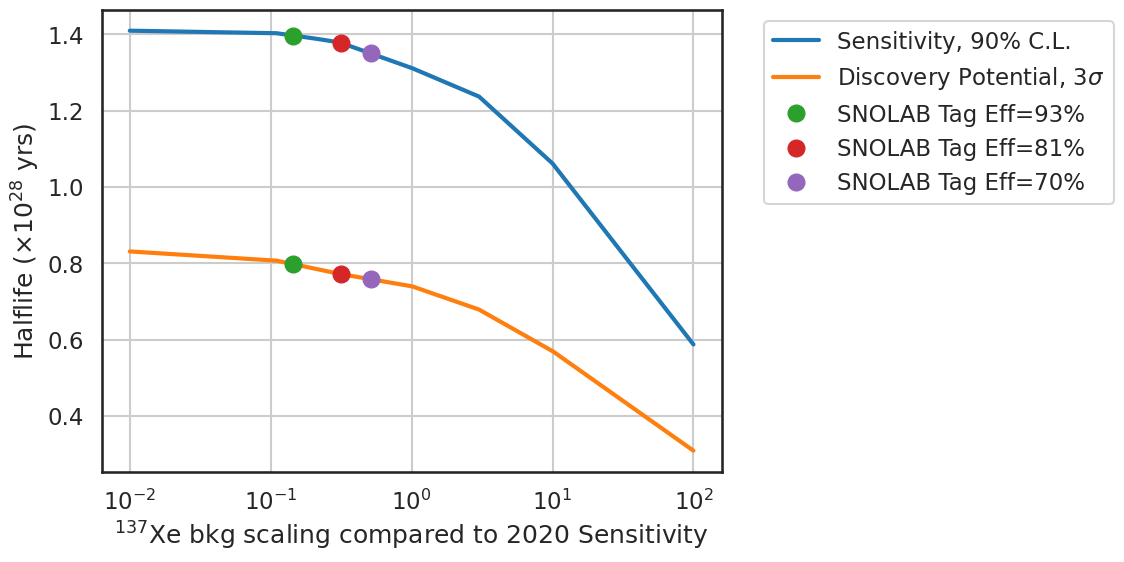

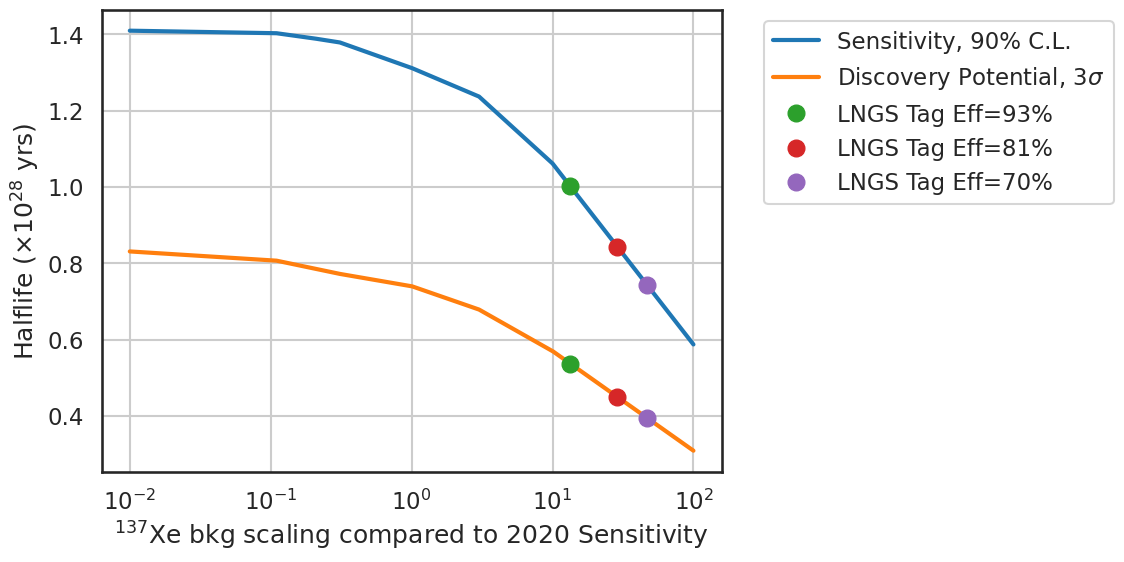

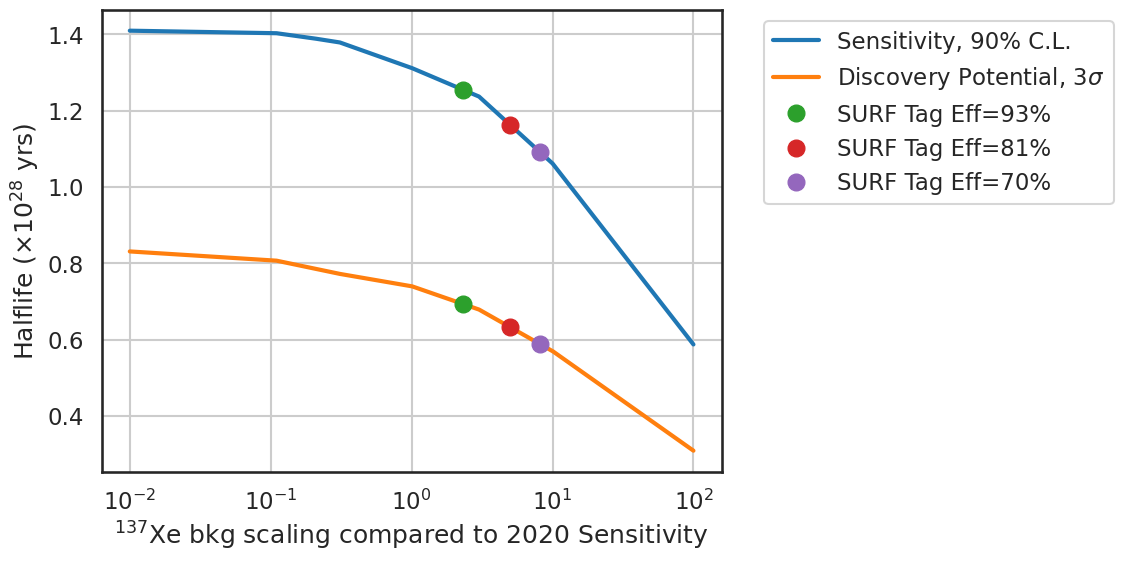

In [18]:
for site in ['SNOLAB', 'LNGS', 'SURF']:
    fig, ax = plt.subplots(figsize=(8, 6))
    # plt.plot(x, y, 'o',linewidth=3,markersize=7,label='90\% CL upper limit')
    plt.plot(x_dense, sens_log_interp(x_dense), '-', linewidth=3, markersize=7, label=r'Sensitivity, 90% C.L.')
    plt.plot(x_dense, dp_log_interp(x_dense), '-', linewidth=3, markersize=7, label=r'Discovery Potential, 3$\sigma$')
    for eff in [0.93, 0.81, 0.70]:
        scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==1)][['Xe137_scaling','sens','dp']].values[0]
        plt.plot([scaling,scaling], [sens,dp], 'o', label=f"{site} Tag Eff={eff*100:.0f}%", markersize=12)
    plt.semilogx()
    plt.xlabel(r'$^{137}$Xe bkg scaling compared to 2020 Sensitivity')
    plt.ylabel((r'Halflife ($\times 10^{28}$ yrs)'))
    # plt.ylim(0.,3.)
    # plt.xlim(0.01,100.)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    # plt.legend()
    plt.grid()
    plt.show()
    fig.savefig(Path("results") / f"sensitivity_Xe137_scaling_{site}.png", bbox_inches="tight", transparent=False, facecolor='white')

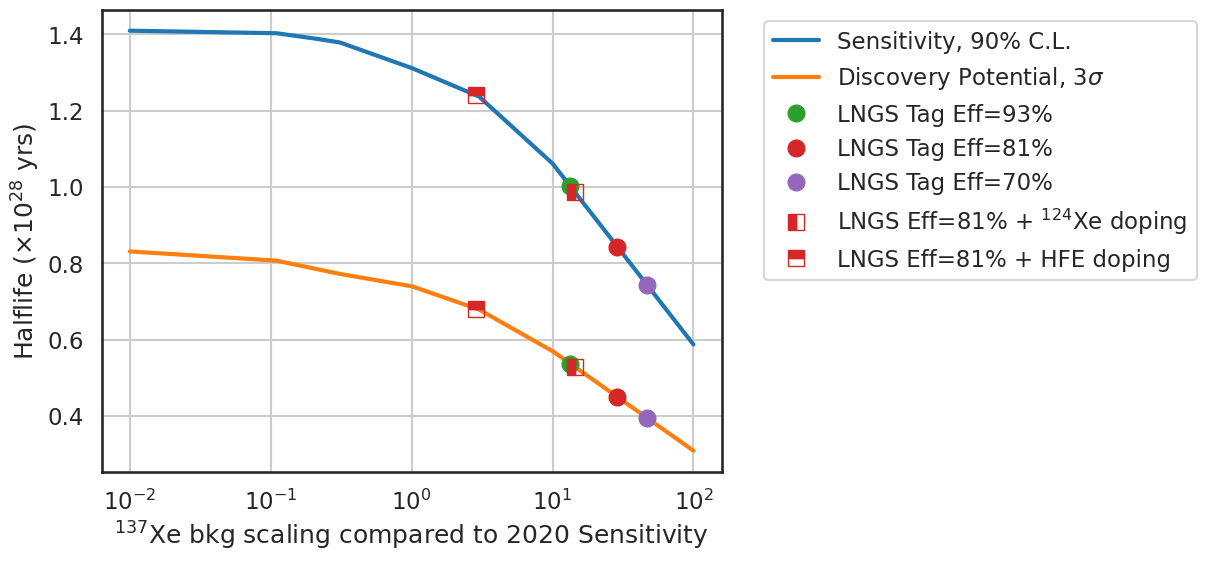

In [19]:
site = 'LNGS'
fig, ax = plt.subplots(figsize=(8, 6))
# plt.plot(x, y, 'o',linewidth=3,markersize=7,label='90\% CL upper limit')
plt.plot(x_dense, sens_log_interp(x_dense), '-',linewidth=3,markersize=7,label=r'Sensitivity, 90% C.L.')
plt.plot(x_dense, dp_log_interp(x_dense), '-',linewidth=3,markersize=7,label=r'Discovery Potential, 3$\sigma$')
for eff in [0.93, 0.81, 0.70]:
    scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==1)][['Xe137_scaling','sens','dp']].values[0]
    plt.plot([scaling,scaling], [sens,dp], 'o', label=f"{site} Tag Eff={eff*100:.0f}%", markersize=12)

eff = 0.81 
scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==2)][['Xe137_scaling','sens','dp']].values[0]
plt.plot([scaling,scaling], [sens,dp], 's', label=f"LNGS Eff={eff*100:.0f}% + " + "$^{124}$Xe doping", 
         color=sns.color_palette("tab10").as_hex()[3], markersize=12, fillstyle='left')

scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==10)][['Xe137_scaling','sens','dp']].values[0]
plt.plot([scaling,scaling], [sens,dp], 's', label=f"LNGS Eff={eff*100:.0f}% + HFE doping", 
         color=sns.color_palette("tab10").as_hex()[3], markersize=12, fillstyle='top')

plt.semilogx()
plt.xlabel(r'$^{137}$Xe bkg scaling compared to 2020 Sensitivity')
plt.ylabel((r'Halflife ($\times 10^{28}$ yrs)'))
# plt.ylim(0.,3.)
# plt.xlim(0.01,100.)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.legend()
plt.grid()
plt.show()
fig.savefig(Path("results") / f"sensitivity_Xe137_scaling_{site}_doped.png", bbox_inches="tight", transparent=False, facecolor='white')

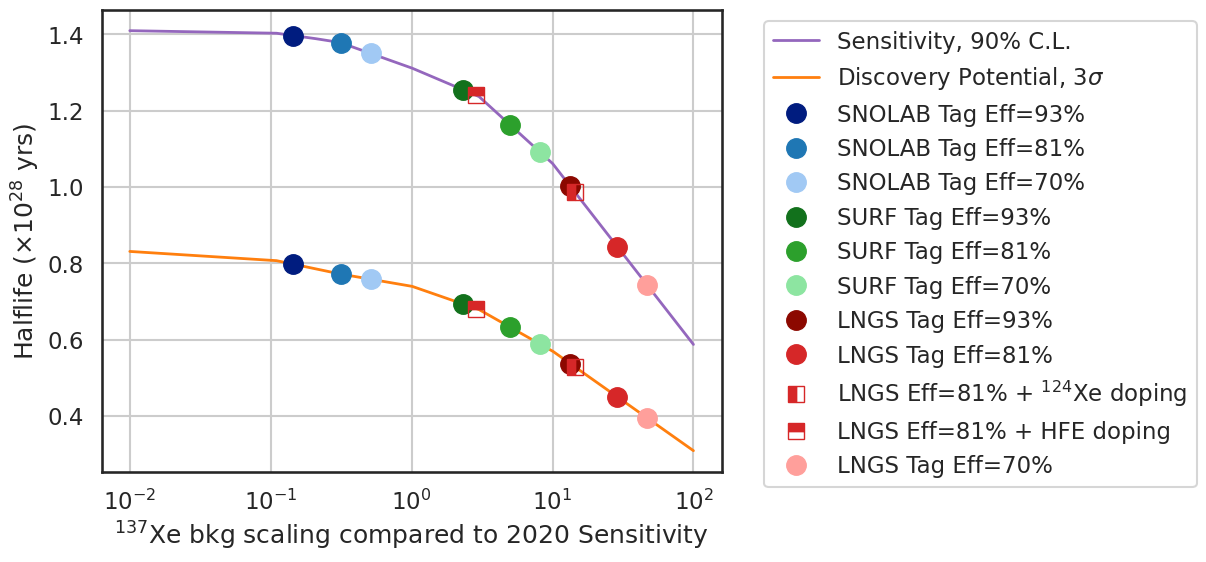

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(x_dense, sens_log_interp(x_dense), '-',linewidth=2, markersize=7,label=r'Sensitivity, 90% C.L.', 
         color=sns.color_palette("tab10").as_hex()[4])
plt.plot(x_dense, dp_log_interp(x_dense), '-',linewidth=2, markersize=7,label=r'Discovery Potential, 3$\sigma$', 
         color=sns.color_palette("tab10").as_hex()[1])
# plt.plot(x, y, 'o',linewidth=3,markersize=7,label='90\% CL upper limit')

for (site, col_idx) in zip(['SNOLAB', 'SURF', 'LNGS'], [0, 2, 3]):

    for eff, palette in zip([0.93, 0.81, 0.70],['dark','tab10','pastel']):
        scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==1)][['Xe137_scaling','sens','dp']].values[0]
        plt.plot([scaling,scaling], [sens,dp], 'o', label=f"{site} Tag Eff={eff*100:.0f}%", markersize=14,
                 color=sns.color_palette(palette).as_hex()[col_idx])

        if site == 'LNGS' and eff==0.81:
            scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==2)][['Xe137_scaling','sens','dp']].values[0]
            plt.plot([scaling,scaling], [sens,dp], 's', label=f"LNGS Eff={eff*100:.0f}% + " + "$^{124}$Xe doping",
                     color=sns.color_palette(palette).as_hex()[col_idx], markersize=12, fillstyle='left')

            scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==10)][['Xe137_scaling','sens','dp']].values[0]
            plt.plot([scaling,scaling], [sens,dp], 's', label=f"LNGS Eff={eff*100:.0f}% + HFE doping", 
                     color=sns.color_palette(palette).as_hex()[col_idx], markersize=12, fillstyle='top')

plt.semilogx()
plt.xlabel(r'$^{137}$Xe bkg scaling compared to 2020 Sensitivity')
plt.ylabel((r'Halflife ($\times 10^{28}$ yrs)'))
handles,labels = ax.get_legend_handles_labels()
# plt.ylim(0.,3.)
# plt.xlim(0.01,100.)
# labels[2] = "SNOLAB Achievable"
# labels[3] = "SNOLAB Aggressive"
# labels[4] = "LNGS Achievable"
# labels[5] = "LNGS Aggressive"
# labels[6] = "LNGS Design mod"
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.legend()
plt.grid()
plt.show()
fig.savefig(Path("results") / f"sensitivity_Xe137_scaling_all.png", bbox_inches="tight", transparent=False, facecolor='white')

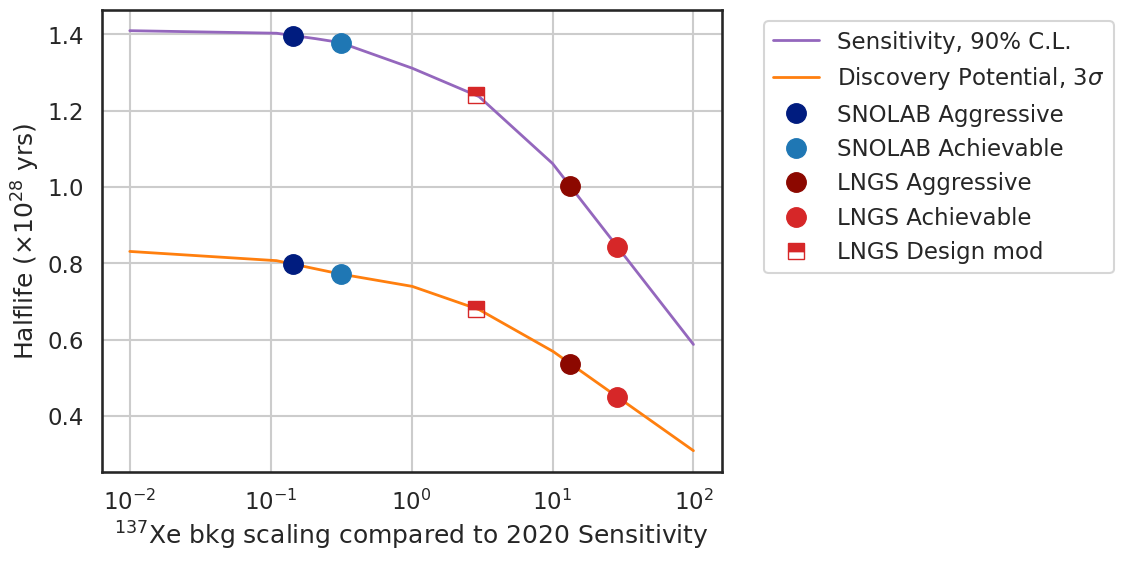

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.plot(x_dense, sens_log_interp(x_dense), '-',linewidth=2, markersize=7,label=r'Sensitivity, 90% C.L.',
         color=sns.color_palette("tab10").as_hex()[4])
plt.plot(x_dense, dp_log_interp(x_dense), '-',linewidth=2, markersize=7,label=r'Discovery Potential, 3$\sigma$',
         color=sns.color_palette("tab10").as_hex()[1])
# plt.plot(x, y, 'o',linewidth=3,markersize=7,label='90\% CL upper limit')

for (site, col_idx) in zip(['SNOLAB', 'LNGS'], [0, 3]):

    for eff, palette, label in zip([0.93, 0.81],['dark','tab10'],['Aggressive','Achievable']):
        scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==1)][['Xe137_scaling','sens','dp']].values[0]
        plt.plot([scaling,scaling], [sens,dp], 'o', label=f"{site} {label}", markersize=14,
                 color=sns.color_palette(palette).as_hex()[col_idx])

        if site == 'LNGS' and eff==0.81:
            scaling, sens, dp = df[(round(df.Xe137_tag_eff,2)==eff) & (df.site==site) & (df.n_absorber_factor==10)][['Xe137_scaling','sens','dp']].values[0]
            plt.plot([scaling,scaling], [sens,dp], 's', label=f"{site} Design mod",
                     color=sns.color_palette(palette).as_hex()[col_idx], markersize=12, fillstyle='top')

plt.semilogx()
plt.xlabel(r'$^{137}$Xe bkg scaling compared to 2020 Sensitivity')
plt.ylabel((r'Halflife ($\times 10^{28}$ yrs)'))
# handles,labels = ax.get_legend_handles_labels()
# plt.ylim(0.,3.)
# plt.xlim(0.01,100.)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.legend()
plt.grid()
plt.show()
fig.savefig(Path("results") / f"sensitivity_Xe137_scaling_main.png", bbox_inches="tight", transparent=False, facecolor='white')

# Compute mbb range

In [32]:
data_short = pd.read_csv('../Downselect_Plots/matrix_elements_short.csv', header=None, 
                        names=['NME', 'iso', 'method', 'ref'])
Xe136_data = data_short[data_short.iso=='136Xe']
Xe136_data = Xe136_data.assign(phase_space = 14.58e-15)
Xe136_data

,NME,iso,method,ref,phase_space
0,2.28,136Xe,NSM,Menendez2018,1.458000e-14
1,2.18,136Xe,QRPA,Simkovic2013,1.458000e-14
2,1.55,136Xe,QRPA,Mustonen2013,1.458000e-14
3,2.02,136Xe,QRPA,Engel2014,1.458000e-14
4,2.91,136Xe,QRPA,Hyvaerinen2015,1.458000e-14
5,3.05,136Xe,IBM,Barea2015,1.458000e-14
6,4.77,136Xe,EDF,Vaquero2013,1.458000e-14
7,4.32,136Xe,EDF,Yao2015,1.458000e-14
8,1.70,136Xe,NSM,Caurier2008,1.458000e-14
9,3.35,136Xe,QRPA,Suhonen2010,1.458000e-14


In [33]:
m_e = 511e6 # in meV
g_A = 1.27 

def compute_mbb(NME, T, G):
    m_bb = m_e**2/(T * G * NME**2 * g_A**4)
    return np.sqrt(m_bb)

def compute_mbb_range(s):
    mbb_serie = Xe136_data.apply(lambda x: compute_mbb(x['NME'], s['sens']*1e28, x['phase_space']), axis=1)
    s['mbb_sens_min'] = mbb_serie.min()
    s['mbb_sens_max'] = mbb_serie.max()
    s['mbb_sens_median'] = mbb_serie.median()
    mbb_serie = Xe136_data.apply(lambda x: compute_mbb(x['NME'], s['dp']*1e28, x['phase_space']), axis=1)
    s['mbb_dp_min'] = mbb_serie.min()
    s['mbb_dp_max'] = mbb_serie.max()
    s['mbb_dp_median'] = mbb_serie.median()
    return s

In [34]:
df = df.apply(compute_mbb_range, axis=1)
display(df)

,site,method,cap_vol,cap_e_min,cap_e_max,Xe137_tag_eff,mean,counts,bins,n_absorber_factor,...,Xe137_num_counts_in_roi,Xe137_bkg_fraction,sens,dp,mbb_sens_min,mbb_sens_max,mbb_sens_median,mbb_dp_min,mbb_dp_max,mbb_dp_median
0,SNOLAB,LightOnly,All LXe,0,4600,0.968309,4.0475,"[9.0, 29.0, 60.0, 0.0, 83.0, 68.0, 65.0, 0.0, ...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6...",1,...,0.029972,0.5,1.4048230105470991,0.8102178222403389,4.640935,19.943479,8.049913,6.111044,26.260973,10.599884
1,SNOLAB,LightOnly,All LXe,400,4600,0.931757,5.9825,"[2.0, 7.0, 20.0, 0.0, 46.0, 45.0, 61.0, 0.0, 5...","[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.5, 5.25, 6...",1,...,0.036940,0.6,1.396598345611107,0.7976447248073572,4.654581,20.002117,8.073582,6.159019,26.467137,10.683099
2,SNOLAB,LightOnly,All LXe,1400,4600,0.813895,13.0275,"[11.0, 11.0, 15.0, 26.0, 26.0, 46.0, 45.0, 52....","[5.0, 6.1, 7.2, 8.3, 9.4, 10.5, 11.6, 12.7, 13...",1,...,0.062308,1.1,1.3776393343511446,0.7717263664588723,4.686499,20.139280,8.128946,6.261590,26.907915,10.861013
3,SNOLAB,LightOnly,All LXe,1800,4600,0.779061,15.2575,"[7.0, 9.0, 11.0, 25.0, 24.0, 23.0, 39.0, 42.0,...","[6.0, 7.1, 8.2, 9.3, 10.4, 11.5, 12.6, 13.7, 1...",1,...,0.070338,1.2,1.3686364952953247,0.7673954660072765,4.701888,20.205410,8.155638,6.279235,26.983737,10.891618
4,SNOLAB,LightOnly,All LXe,2600,4600,0.703299,21.2025,"[9.0, 5.0, 11.0, 11.0, 31.0, 24.0, 24.0, 27.0,...","[10.0, 11.25, 12.5, 13.75, 15.0, 16.25, 17.5, ...",1,...,0.091746,1.6,1.3498883768116845,0.7583765071761863,4.734427,20.345239,8.212078,6.316462,27.143715,10.956190
5,SNOLAB,LightOnly,All LXe,400,9000,0.938704,5.3750,"[2.0, 17.0, 25.0, 54.0, 0.0, 57.0, 72.0, 56.0,...","[0.0, 0.8, 1.6, 2.4, 3.2, 4.0, 4.8, 5.6, 6.4, ...",1,...,0.034752,0.6,1.3989852451207965,0.8012510550950966,4.650608,19.985046,8.066691,6.145143,26.407507,10.659030
6,SNOLAB,LightOnly,All LXe,1400,9000,0.820841,11.6650,"[2.0, 4.0, 8.0, 6.0, 21.0, 34.0, 35.0, 39.0, 5...","[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0...",1,...,0.057402,1.0,1.381713557975653,0.7751555247977211,4.679585,20.109566,8.116952,6.247725,26.848331,10.836963
7,LNGS,LightOnly,All LXe,0,4600,0.968309,377.7100,"[1.0, 0.0, 4.0, 2.0, 1.0, 2.0, 9.0, 9.0, 12.0,...","[319.0, 324.8, 330.6, 336.4, 342.2, 348.0, 353...",1,...,1.375498,20.3,1.0750729413969369,0.5784220175258483,5.305146,22.797790,9.202017,7.232591,31.080594,12.545258
8,LNGS,LightOnly,All LXe,400,4600,0.931757,553.1000,"[2.0, 1.0, 2.0, 3.0, 6.0, 5.0, 6.0, 14.0, 5.0,...","[496.0, 501.9, 507.8, 513.7, 519.6, 525.5, 531...",1,...,2.007061,27.1,1.0021090340252268,0.5373112342003636,5.494888,23.613166,9.531133,7.504182,32.247701,13.016345
9,LNGS,LightOnly,All LXe,1400,4600,0.813895,1193.2400,"[1.0, 1.0, 1.0, 5.0, 2.0, 7.0, 3.0, 6.0, 15.0,...","[1109.0, 1117.35, 1125.7, 1134.05, 1142.4, 115...",1,...,4.312149,44.5,0.8437609939292311,0.450157032365681,5.988342,25.733686,10.387051,8.198498,35.231384,14.220668


In [35]:
df.to_csv(Path("results") / "sensitivity_results.csv")